## ENHANCING HEALTHCARE ACCESSIBILITY IN NAIROBI
## Analyze and interpret the data to propose actionable recommendations for imporving access to Quality Healthcare in Nairobi in alignment with the Sustainable Development Goal(SDG3)

## To make actionable recommendations for improving access to quality healthcare in Nairobi, these are the steps I have taken:
### 1. Simply defining teh problem statment for easier subsequent approaches:
##### => Where should the Nairobi County Health Officer prioritize investments to improve equitable access to healthcare?

### 2. Inspecting teh data thoroughly to get its structure, check for irrelevant and relevant needed data to help with solving out problem: Exploratory Data Analysis
##### => checking for missing values, data types, unique values, is it possible to fill in teh mssing values with the mean or median or just use hte available ones?

### 3. I came up with a few questions to guide on the EDA process, Using the SDG3 goals:
##### => i)Are facilities evenly distributed across sub-counties in Nairobi?
##### => ii)Which critical services are missing in high-populated area?
##### 4. Dropping irrelevant columns and maintinagin the needed ones to help in solving our problem statement.
##### 5. Cross-chekicng the health facilities data with the populaiton density data to validate the data

In [11]:
# Loading the census data:
# i)Health facilities data - 
# ii)Land area populaiton density data
import pandas as pd 

facilities_data = pd.read_csv('C:/Users/Bina/Downloads/Health facilities_ DDI - Facilities.csv', delimiter = ',')
landarea_popdensity_data = pd.read_csv('C:/Users/Bina/Downloads/landareapopulationdensity - kenya-populationland-area-population-density_by_subcounty.csv',delimiter = ',')

# checking the columns heads for the facilities
facilities_data.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# checking the columns heads for the landarea_popdensity_data
landarea_popdensity_data.head()

,National/ County,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km)
0,Kenya,47564296,580876.3,82
1,Mombasa,1208333,219.9,5495
2,Changamwe,131882,17.7,7457
3,Jomvu,163415,36.9,4432
4,Kisauni,291930,87.7,3328


In [15]:
# filterign the data to only have Nairobi COunty as this is our focus
facilities_data=facilities_data[facilities_data['County'] == 'Nairobi']
print(f"Total health facilities in Nairobi county: {len(facilities_data)}")
# displaying the first 10 rows to verify if teh filterign thappened
print(facilities_data.head())

# checking the column names of teh filtered data
print(facilities_data.info())

Total health facilities in Nairobi county: 942
    Facility Code                                Facility Name Province  \
1           19310   St Jude's Huruma Community Health Services  Nairobi   
7           13043                        7Kr Mrs Health Centre  Nairobi   
10          20346                      AAR Adams Health Centre  Nairobi   
11          12861                       AAR City Centre Clinic  Nairobi   
12          16796          AAR Clinic Sarit Centre (Westlands)  Nairobi   

     County   District   Division            Type  \
1   Nairobi    Mathare     Huruma  Medical Clinic   
7   Nairobi    Langata   Lang'ata   Health Centre   
10  Nairobi      Kibra     Woodly  Medical Clinic   
11  Nairobi    Starehe    Starehe  Medical Clinic   
12  Nairobi  Westlands  Parklands  Medical Clinic   

                                      Owner                   Location  \
1            Private Practice - Unspecified                     Huruma   
7                              Arme

In [17]:
facilities_data.head()
facilities_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            942 non-null    int64  
 1   Facility Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 914 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 894 non-null    object 
 9   Sub Location             672 non-null    object 
 10  Description of Location  641 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest Town             824 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                     942 

In [73]:
# dropping teh columns I do not want in teh analysis
# 1. defining teh columns to drop
facilitites_columns_to_drop = ['Facility Code', 'Province','Description of Location','Nearest Town','Official Landline','Official Fax','Official Mobile','Official Email','Official Address',
                             'Town','Post Code','In Charge','Job Title of in Charge','Division','District','Sub Location', 'Location','Official Alternate No']
# 2. backingn up the initial data before dropping
facilitites_data_backup = facilities_data.copy()
# 3. dropping the columns
facilities_data.drop(columns=facilitites_columns_to_drop, axis=1, inplace=True)
# chekcign teh the remaining columns after dropping
print(facilities_data.columns)

Index(['Facility Name', 'County', 'Type', 'Owner', 'Constituency', 'Beds',
       'Cots', 'Open 24 Hours', 'Open Weekends', 'Operational Status', 'ANC',
       'ART', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP',
       'GROWM', 'HBC', 'HCT', 'IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY',
       'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH'],
      dtype='object')


In [19]:
facilities_data.head()
facilities_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            942 non-null    int64  
 1   Facility Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 914 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 894 non-null    object 
 9   Sub Location             672 non-null    object 
 10  Description of Location  641 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest Town             824 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                     942 

In [21]:
# checking for missing values now
missing_values = facilities_data.isnull().sum()
print(missing_values)

Facility Code                0
Facility Name                0
Province                     0
County                       0
District                     0
Division                    28
Type                         0
Owner                        0
Location                    48
Sub Location               270
Description of Location    301
Constituency                 0
Nearest Town               118
Beds                         0
Cots                         0
Official Landline          745
Official Fax               923
Official Mobile            637
Official Email             720
Official Address           530
Official Alternate No      785
Town                       508
Post Code                  545
In Charge                  350
Job Title of in Charge     389
Open 24 Hours               11
Open Weekends                9
Operational Status           0
ANC                        942
ART                        833
BEOC                       942
BLOOD                      942
CAES SEC

In [23]:
# dropping these columns since they are all 100% empty thus would not give any analytical value at the moment and 
# would take time to obtain the record form the healt county office
facilities_columns_to_drop=['ANC', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'EPI', 'GROWM', 'HCT', 'OPD', 'OUTREACH', 'PMTCT', 
                            'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']
# facilitites_data_backup = facilities_data.copy()
facilities_data.drop(columns=facilities_columns_to_drop, axis=1, inplace=True)
# chekcign teh the remaining columns after dropping
print(facilities_data.columns)

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Landline', 'Official Fax', 'Official Mobile',
       'Official Email', 'Official Address', 'Official Alternate No', 'Town',
       'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours',
       'Open Weekends', 'Operational Status', 'ART', 'C-IMCI', 'FP', 'HBC',
       'IPD'],
      dtype='object')


In [25]:
# checking again for missing value
missing_values = facilities_data.isnull().sum()
print(missing_values)
# for the `Open 24 Hours` and `Open Weekends` columns I can fill them with mode and mean respectively 
# Fill partially missing values
facilities_data['Open 24 Hours'].fillna('N', inplace=True)
facilities_data['Open Weekends'].fillna('Y', inplace=True)
print(facilities_data.head())
print(facilities_data.info())

Facility Code                0
Facility Name                0
Province                     0
County                       0
District                     0
Division                    28
Type                         0
Owner                        0
Location                    48
Sub Location               270
Description of Location    301
Constituency                 0
Nearest Town               118
Beds                         0
Cots                         0
Official Landline          745
Official Fax               923
Official Mobile            637
Official Email             720
Official Address           530
Official Alternate No      785
Town                       508
Post Code                  545
In Charge                  350
Job Title of in Charge     389
Open 24 Hours               11
Open Weekends                9
Operational Status           0
ART                        833
C-IMCI                     870
FP                         662
HBC                        692
IPD     

C:\Users\Bina\AppData\Local\Temp\ipykernel_9736\4231197566.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  facilities_data['Open 24 Hours'].fillna('N', inplace=True)
C:\Users\Bina\AppData\Local\Temp\ipykernel_9736\4231197566.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [153]:
# Calculate public facility owned by MoH
public_facilities = facilities_data[facilities_data['Owner'] == 'Ministry of Health']
print(f"Public facilities in nairobi: {len(public_facilities)} ({len(public_facilities)/len(facilities_data):.1%})")
print(public_facilities[['Facility Name', 'Owner']].head())
# owned by ngos
ngo_facilities = facilities_data[facilities_data['Owner'] == 'Non Governmental Organizations']
print(f"NGO facilities in nairobi: {len(ngo_facilities)} ({len(ngo_facilities)/len(facilities_data):.1%})")
# privately owned
private_practice = facilities_data[facilities_data['Owner'].str.startswith('Private Practice', na=False)]
# Count the number of such facilities
print(f"Number of 'Private Practice' facilities in Nairobi: {len(private_practice)}")
print(private_practice[['Facility Name', 'Owner']].head())

Public facilities in nairobi: 56 (5.9%)
                        Facility Name               Owner
241  State House Dispensary (Nairobi)  Ministry of Health
327             Afya House Dispensary  Ministry of Health
447     Dagoretti Approved Dispensary  Ministry of Health
893                      KEMRI Mimosa  Ministry of Health
895                         Kemri VCT  Ministry of Health
NGO facilities in nairobi: 0 (0.0%)
Number of 'Private Practice' facilities in Nairobi: 337
                                  Facility Name  \
1    St Jude's Huruma Community Health Services   
10                      AAR Adams Health Centre   
15                              AAR Health Care   
20                            AAR Mountain mall   
22                AAR Outpatient Center Donholm   

                                      Owner  
1            Private Practice - Unspecified  
10  Private Practice - General Practitioner  
15    Private Practice - Medical Specialist  
20       Private Practice - N

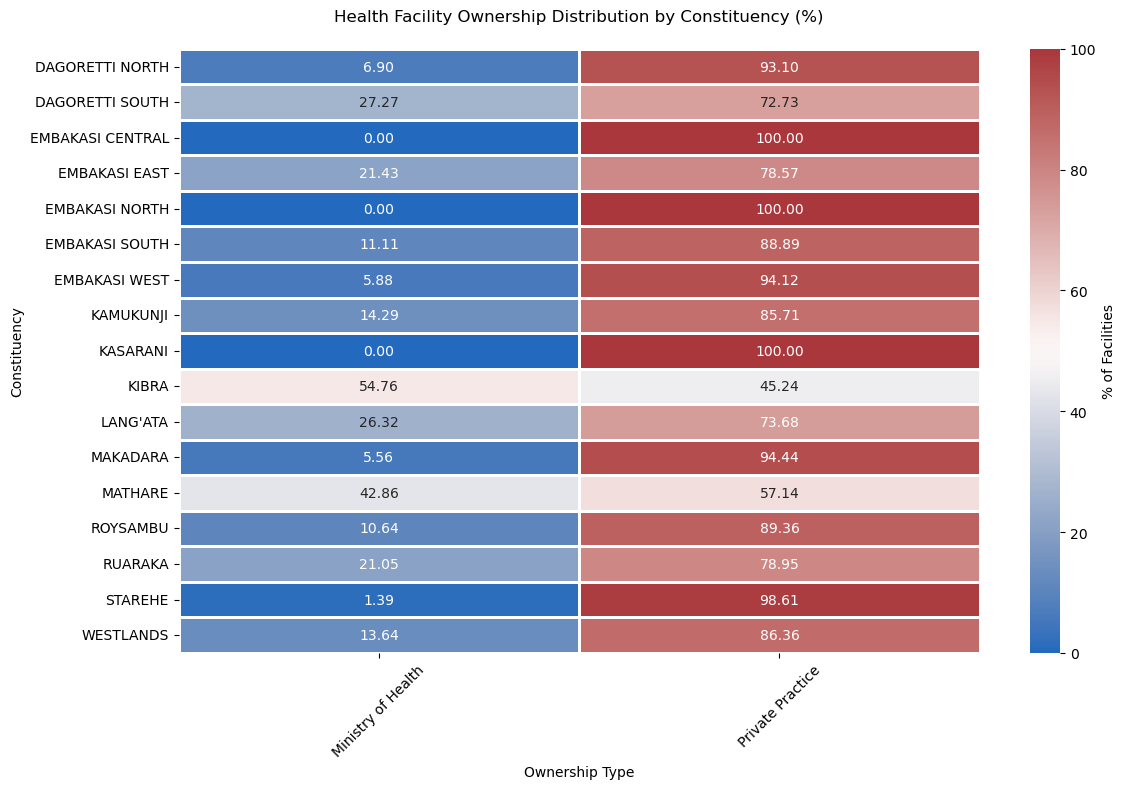

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating a column since the `Private Practice` are many
facilities_data['Owner_Category'] = facilities_data['Owner'].apply(
    lambda x: 'Private Practice' if str(x).startswith('Private Practice') 
              else x  # Keep original for others
)

# grouping by constituency and owern category
ownership_heatmap_data = facilities_data.groupby(['Constituency', 'Owner_Category']).size().unstack(fill_value=0)
# selectign teh main ownership types
focus_owners = ['Ministry of Health', 'Private Practice',]
ownership_heatmap_data = ownership_heatmap_data[focus_owners]
# using %
ownership_percent = ownership_heatmap_data.div(ownership_heatmap_data.sum(axis=1), axis=0) * 100
# creating a heatmap to show the distibution by constituency
plt.figure(figsize=(12, 8))
sns.heatmap(
    ownership_percent,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    linewidths=0.8,
    cbar_kws={'label': '% of Facilities'}
)

plt.title("Health Facility Ownership Distribution by Constituency (%)", pad=20)
plt.xlabel("Ownership Type")
plt.ylabel("Constituency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# # chekcing teh subcoounty form teh landarea data with teh facilitites data to checkc the disparty in population density witht eh 
# # available facilitites
facility_constituencies = sorted(facilities_data['Constituency'].str.strip().str.upper().unique())
landarea_subcounties = sorted(landarea_popdensity_data['National/ County'].str.strip().str.upper().unique())

print("Facilities Constituencies in Nairobi:\n", facility_constituencies)
# print("\nLand Area Sub-Counties in Nairobi:\n", landarea_subcounties)

Facilities Constituencies in Nairobi:
 ['DAGORETTI NORTH', 'DAGORETTI SOUTH', 'EMBAKASI CENTRAL', 'EMBAKASI EAST', 'EMBAKASI NORTH', 'EMBAKASI SOUTH', 'EMBAKASI WEST', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'ROYSAMBU', 'RUARAKA', 'STAREHE', 'WESTLANDS']


In [33]:
# claeniang the land names
landarea_popdensity_data['Cleaned_Area'] = (
    landarea_popdensity_data['National/ County']
    .str.strip()
    .str.upper()
    .str.replace("NAIROBI ", "")
    .str.replace(" CONSTITUENCY", "")
    .str.replace(" SUB-COUNTY", "")
)

# finding exact matches btn facilitties_data Consitucney and landarea Nation/ County columns
exact_matches = landarea_popdensity_data[
    landarea_popdensity_data['Cleaned_Area'].isin(facility_constituencies)
]

print(f"Found {len(exact_matches)} exact matches:")
print(exact_matches[['National/ County', 'Cleaned_Area', 'Population Density (No. per Sq. Km)']])
combined_areas = {
    'EMBAKASI': ['EMBAKASI CENTRAL', 'EMBAKASI EAST', 'EMBAKASI NORTH', 
                'EMBAKASI SOUTH', 'EMBAKASI WEST'],
    'DAGORETTI': ['DAGORETTI NORTH', 'DAGORETTI SOUTH']
}
# creating a consituency-density mapping: teh landarea data is missing specific constiruncy data so I used hte 
# parent area population
constituency_density = {}
# gettingt eh exact matches
for const in facility_constituencies:
    match = landarea_popdensity_data[landarea_popdensity_data['Cleaned_Area'] == const]
    if not match.empty:
        constituency_density[const] = match.iloc[0]['Population Density (No. per Sq. Km)']

# for combined ares like Embakasi and Dagoretti
for parent_area, sub_areas in combined_areas.items():
    parent_match = landarea_popdensity_data[
        landarea_popdensity_data['Cleaned_Area'] == parent_area
    ]
    if not parent_match.empty:
        density = parent_match.iloc[0]['Population Density (No. per Sq. Km)']
        for sub_area in sub_areas:
            if sub_area not in constituency_density:
                constituency_density[sub_area] = density

# Convert to DataFrame
density_data = pd.DataFrame.from_dict(
    constituency_density, 
    orient='index', 
    columns=['Population Density (No. per Sq. Km)']
).reset_index().rename(columns={'index': 'Constituency'})

print("\nPopulation Density (No. per Sq. Km) by Constituency:")
print(density_data.sort_values('Population Density (No. per Sq. Km)', ascending=False))

# checking for missing density data mapping with consituencies present 
missing = set(facility_constituencies) - set(density_data['Constituency'])
if missing:
    print(f"Warning: No density data for: {missing}")
    # Fill missing with Nairobi average if needed
    missing_data = pd.DataFrame([{
        'Constituency': const,
        'Population Density (No. per Sq. Km)': density_data['Population Density (No. per Sq. Km)'].mean()
    } for const in missing])
    density_data = pd.concat([density_data, missing_data], ignore_index=True)
    
print("\nFinal Constituency Density Mapping:")
print(density_data.sort_values('Population Density (No. per Sq. Km)', ascending=False))

Found 7 exact matches:
    National/ County Cleaned_Area  Population Density (No. per Sq. Km)
387        Kamukunji    KAMUKUNJI                                25455
388         Kasarani     KASARANI                                 9058
390         Lang'ata     LANG'ATA                                  911
391         Makadara     MAKADARA                                16150
392          Mathare      MATHARE                                68941
394          Starehe      STAREHE                                10205
395        Westlands    WESTLANDS                                 3167

Population Density (No. per Sq. Km) by Constituency:
        Constituency  Population Density (No. per Sq. Km)
4            MATHARE                                68941
0          KAMUKUNJI                                25455
3           MAKADARA                                16150
12   DAGORETTI NORTH                                14908
13   DAGORETTI SOUTH                                14908
7   EMB

In [35]:
# merging facilittes data witht eh density data now
import numpy as np
# retriving the dropped columns to help see the service gaps
dropped_columns = ['ANC', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'EPI', 'GROWM', 'HCT', 'OPD', 'OUTREACH', 'PMTCT', 
                    'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']
facilities_data[dropped_columns] = np.nan
print(facilities_data.head())
merged_data = pd.merge(
    facilities_data,
    density_data,
    on='Constituency',
    # this keeps all facilities even if density data is missing
    how='left'
)

# # Verify merge
print(f"Merged data shape: {merged_data.shape}")
print(f"Facilities without density data: {merged_data['Population Density (No. per Sq. Km)'].isnull().sum()}")

    Facility Code                                Facility Name Province  \
1           19310   St Jude's Huruma Community Health Services  Nairobi   
7           13043                        7Kr Mrs Health Centre  Nairobi   
10          20346                      AAR Adams Health Centre  Nairobi   
11          12861                       AAR City Centre Clinic  Nairobi   
12          16796          AAR Clinic Sarit Centre (Westlands)  Nairobi   

     County   District   Division            Type  \
1   Nairobi    Mathare     Huruma  Medical Clinic   
7   Nairobi    Langata   Lang'ata   Health Centre   
10  Nairobi      Kibra     Woodly  Medical Clinic   
11  Nairobi    Starehe    Starehe  Medical Clinic   
12  Nairobi  Westlands  Parklands  Medical Clinic   

                                      Owner                   Location  \
1            Private Practice - Unspecified                     Huruma   
7                              Armed Forces                  Mugumoini   
10  Priv

In [37]:
# 1. health facilities  per person
merged_data['Facilities_per_10k'] = (
    merged_data.groupby('Constituency')['Facility Name'].transform('count') / 
    (merged_data['Population Density (No. per Sq. Km)'])
)

# 2. beds per person
if 'Beds' in merged_data.columns:
    merged_data['Beds_per_1k'] = (
        merged_data.groupby('Constituency')['Beds'].transform('sum') / 
        (merged_data['Population Density (No. per Sq. Km)'])
    )

# 3. services coverage eg ANC, TB_DIAG
service_columns = ['ANC', 'TB_DIAG', 'CEOC','RAD/XRAY']
for service in service_columns:
    if service in merged_data.columns:
        merged_data[f'{service}_Coverage'] = (
            merged_data.groupby('Constituency')[service].transform('mean')
        )

#constituencies with worst access to health care
worst_access = merged_data.groupby('Constituency').agg({
    'Facilities_per_10k': 'mean',
    'Population Density (No. per Sq. Km)': 'mean'
}).nsmallest(5, 'Facilities_per_10k')

if 'ANC_Coverage' in merged_data.columns:
    worst_anc = merged_data.groupby('Constituency')['ANC_Coverage'].mean().nsmallest(3)
    print("\nWorst ANC Coverage Areas:")
    print(worst_anc)

print("\nTop 5 Constituencies Needing More Facilities:")
print(worst_access)


Worst ANC Coverage Areas:
Constituency
DAGORETTI NORTH    NaN
DAGORETTI SOUTH    NaN
EMBAKASI CENTRAL   NaN
Name: ANC_Coverage, dtype: float64

Top 5 Constituencies Needing More Facilities:
                 Facilities_per_10k  Population Density (No. per Sq. Km)
Constituency                                                            
MATHARE                    0.000232                              68941.0
EMBAKASI NORTH             0.001222                              11460.0
DAGORETTI SOUTH            0.001945                              14908.0
KAMUKUNJI                  0.002318                              25455.0
EMBAKASI EAST              0.002356                              11460.0


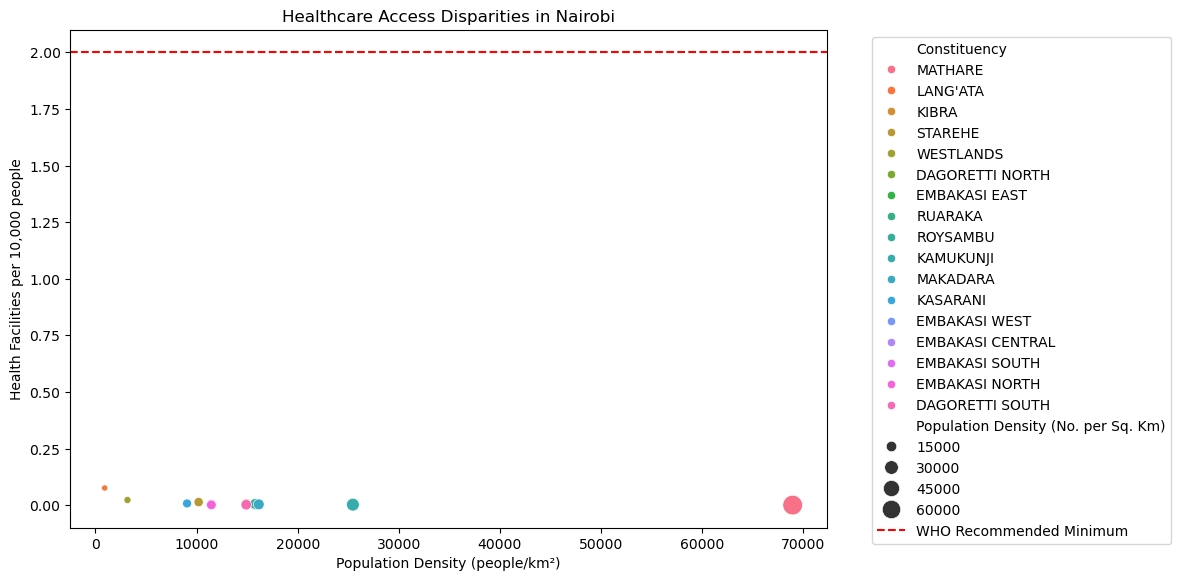

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# using a scatterplot to visualize the siplarities per sub county against the WHO recommendations
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_data.drop_duplicates('Constituency'),
    x='Population Density (No. per Sq. Km)',
    y='Facilities_per_10k',
    hue='Constituency',
    size='Population Density (No. per Sq. Km)',
    sizes=(20, 200)
)
plt.axhline(y=2, color='red', linestyle='--', 
            label='WHO Recommended Minimum')
plt.title("Healthcare Access Disparities in Nairobi")
plt.xlabel("Population Density (people/km²)")
plt.ylabel("Health Facilities per 10,000 people")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [43]:
# gaps
infra_gaps = merged_data[
    (merged_data['Facilities_per_10k'] < 2) & 
    (merged_data['Population Density (No. per Sq. Km)'] > 10000)
].groupby('Constituency').size()

print("\nPriority Areas for New Facilities:")
print(infra_gaps.sort_values(ascending=False))


Priority Areas for New Facilities:
Constituency
STAREHE             137
KIBRA                85
ROYSAMBU             83
DAGORETTI NORTH      76
KAMUKUNJI            59
MAKADARA             55
EMBAKASI CENTRAL     44
RUARAKA              41
EMBAKASI WEST        40
DAGORETTI SOUTH      29
EMBAKASI EAST        27
EMBAKASI SOUTH       27
MATHARE              16
EMBAKASI NORTH       14
dtype: int64


In [49]:
# checking teh columns in merged data
print("Available columns in merged_data:")
print(merged_data.columns.tolist())

# defining teh SDG3 targets
sdg3_targets = {
    '3.1': 'Maternal Health (ANC Coverage)',
    '3.3': 'Communicable Diseases (TB Diagnosis)',
    '3.8': 'Universal Health Coverage (Facility Access)'
}

# calculating sdg metrics against the existign columns
try:
    merged_data['SDG_3.1_Score'] = merged_data['ANC_Coverage'] * 100
except KeyError:
    print("Warning: 'ANC_Coverage' column not found - skipping SDG 3.1 calculation")
    merged_data['SDG_3.1_Score'] = None

try:
    # column name variation: TB_DIAG with TB_DIAG_Coverage
    tb_col = next(col for col in merged_data.columns if 'TB' in col or 'DIAG' in col)
    merged_data['SDG_3.3_Score'] = merged_data[tb_col] * 100
except (KeyError, StopIteration):
    print("Warning: Could not find TB diagnosis column - skipping SDG 3.3 calculation")
    merged_data['SDG_3.3_Score'] = None

try:
    merged_data['SDG_3.8_Score'] = (merged_data['Facilities_per_10k'] / 2) * 100
except KeyError:
    print("Warning: 'Facilities_per_10k' column not found - skipping SDG 3.8 calculation")
    merged_data['SDG_3.8_Score'] = None

# idengitying the gaps now
def flag_sdg_gaps(row):
    gaps = []
    if pd.notna(row.get('SDG_3.1_Score')) and row['SDG_3.1_Score'] < 80:
        gaps.append('3.1')
    if pd.notna(row.get('SDG_3.3_Score')) and row['SDG_3.3_Score'] < 90:
        gaps.append('3.3') 
    if pd.notna(row.get('SDG_3.8_Score')) and row['SDG_3.8_Score'] < 100:
        gaps.append('3.8')
    return ', '.join(gaps) if gaps else 'On Track'

merged_data['SDG_Gaps'] = merged_data.apply(flag_sdg_gaps, axis=1)

#analysiing for constituency priority
try:
    sdg_gap_analysis = merged_data.groupby('Constituency').agg({
        'SDG_3.1_Score': 'mean',
        'SDG_3.3_Score': 'mean',
        'SDG_3.8_Score': 'mean',
        'SDG_Gaps': lambda x: x.value_counts().index[0] if not x.empty else 'No Data'
    }).sort_values('SDG_3.8_Score')

    print("\nSDG 3 Gap Analysis by Constituency:")
    print(sdg_gap_analysis.head(5))
    
except Exception as e:
    print(f"Error during analysis: {str(e)}")
    print("Please check your data structure and column names")

Available columns in merged_data:
['Facility Code', 'Facility Name', 'Province', 'County', 'District', 'Division', 'Type', 'Owner', 'Location', 'Sub Location', 'Description of Location', 'Constituency', 'Nearest Town', 'Beds', 'Cots', 'Official Landline', 'Official Fax', 'Official Mobile', 'Official Email', 'Official Address', 'Official Alternate No', 'Town', 'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours', 'Open Weekends', 'Operational Status', 'ART', 'C-IMCI', 'FP', 'HBC', 'IPD', 'Owner_Category', 'ANC', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'EPI', 'GROWM', 'HCT', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH', 'Population Density (No. per Sq. Km)', 'Facilities_per_10k', 'Beds_per_1k', 'ANC_Coverage', 'CEOC_Coverage', 'RAD/XRAY_Coverage', 'SDG_3.1_Score']

SDG 3 Gap Analysis by Constituency:
                 SDG_3.1_Score  SDG_3.3_Score  SDG_3.8_Score SDG_Gaps
Constituency                                              

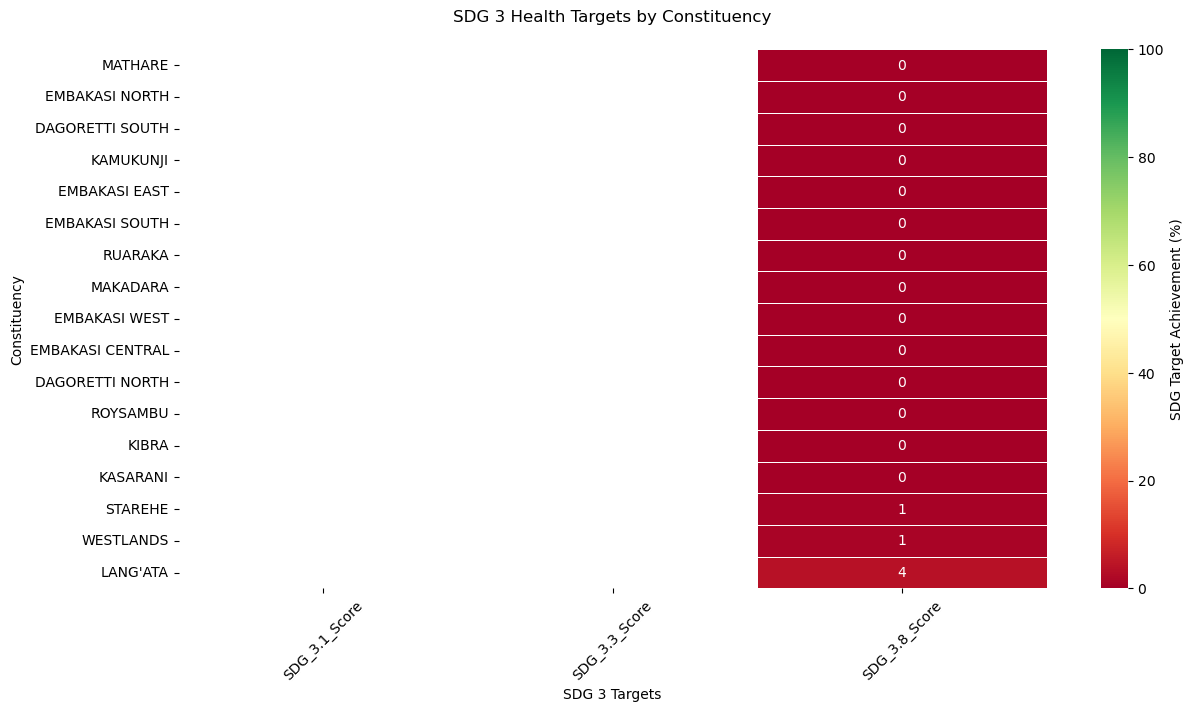

<Figure size 640x480 with 0 Axes>

In [51]:
# Visualizing the gaps now using a heat map

plt.figure(figsize=(14, 7))
sns.heatmap(
    sdg_gap_analysis[['SDG_3.1_Score', 'SDG_3.3_Score', 'SDG_3.8_Score']],
    annot=True, fmt=".0f", cmap="RdYlGn",
    vmin=0, vmax=100, linewidths=0.5,
    cbar_kws={'label': 'SDG Target Achievement (%)'}
)
plt.title("SDG 3 Health Targets by Constituency", pad=20)
plt.xlabel("SDG 3 Targets")
plt.ylabel("Constituency")
plt.xticks(rotation=45)
plt.show()
plt.savefig('sdga_analysis.png', dpi=300, bbox_inches='tight')

In [53]:
# chacking if the SDG 3.1,3.3,3.8 are all present
required_columns = ['SDG_3.1_Score', 'SDG_3.3_Score', 'SDG_3.8_Score']
for col in required_columns:
    if col not in sdg_gap_analysis.columns:
        print(f"Warning: {col} not found in data - creating with default NaN values")
        sdg_gap_analysis[col] = np.nan

# 2. generating recommendations here
def generate_recommendations(row):
    rec = []
    try:
        if pd.notna(row['SDG_Gaps']):
            if '3.1' in row['SDG_Gaps'] and pd.notna(row['SDG_3.1_Score']):
                rec.append(f"Expand ANC services (Current: {row['SDG_3.1_Score']:.0f}%)")
            if '3.3' in row['SDG_Gaps'] and pd.notna(row['SDG_3.3_Score']):
                rec.append(f"Improve TB diagnostics (Current: {row['SDG_3.3_Score']:.0f}%)")
            if '3.8' in row['SDG_Gaps'] and pd.notna(row['SDG_3.8_Score']):
                rec.append(f"Add health facilities (Current: {row['SDG_3.8_Score']:.0f}% of target)")
    except KeyError as e:
        print(f"Missing column in row: {e}")
    return " | ".join(rec) if rec else "Meeting all SDG targets"

sdg_gap_analysis['Recommendations'] = sdg_gap_analysis.apply(generate_recommendations, axis=1)

# displaying the recomendations here
def print_recommendations(sort_column):
    if sort_column in sdg_gap_analysis.columns:
        print(f"\nTop 5 Priority Areas for {sort_column}:")
        print(
            sdg_gap_analysis
            .sort_values(sort_column, ascending=True)
            [['SDG_Gaps', 'Recommendations', sort_column]]
            .head(5)
            .rename(columns={sort_column: 'Score (%)'})
        )
    else:
        print(f"\nCannot sort by {sort_column} - column not found")

# recommendations
# facility access
print_recommendations('SDG_3.8_Score')
# access to maternal healthcare 
print_recommendations('SDG_3.1_Score')
# disease control
print_recommendations('SDG_3.3_Score')


Top 5 Priority Areas for SDG_3.8_Score:
                SDG_Gaps                                Recommendations  \
Constituency                                                              
MATHARE              3.8  Add health facilities (Current: 0% of target)   
EMBAKASI NORTH       3.8  Add health facilities (Current: 0% of target)   
DAGORETTI SOUTH      3.8  Add health facilities (Current: 0% of target)   
KAMUKUNJI            3.8  Add health facilities (Current: 0% of target)   
EMBAKASI EAST        3.8  Add health facilities (Current: 0% of target)   

                 Score (%)  
Constituency                
MATHARE           0.011604  
EMBAKASI NORTH    0.061082  
DAGORETTI SOUTH   0.097263  
KAMUKUNJI         0.115891  
EMBAKASI EAST     0.117801  

Top 5 Priority Areas for SDG_3.1_Score:
                SDG_Gaps                                Recommendations  \
Constituency                                                              
MATHARE              3.8  Add health fa

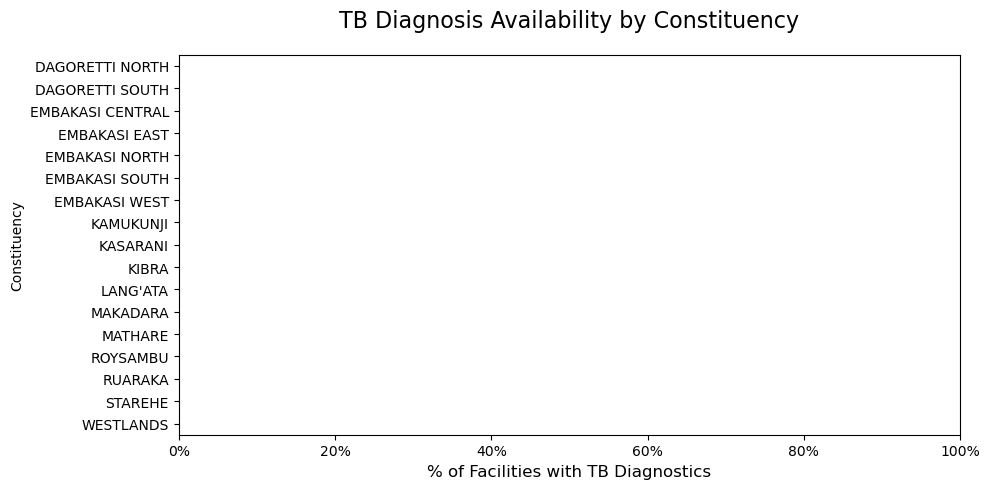

In [55]:
# TB Diagbisiss data
tb_data = merged_data.groupby('Constituency')['TB DIAG'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))

# vairble based on TB converage
tb_data_df = tb_data.reset_index()
tb_data_df['Critical Gap'] = tb_data_df['TB DIAG'] < 0.5

# Plot with corrected syntax
bars = sns.barplot(
    x='TB DIAG',
    y='Constituency',
    data=tb_data_df,
    hue='Critical Gap',
    palette={True: '#FF6B6B', False: '#4CAF50'},
    dodge=False,
    legend=False
)

plt.title('TB Diagnosis Availability by Constituency', fontsize=16, pad=20)
plt.xlabel('% of Facilities with TB Diagnostics', fontsize=12)
plt.xticks(ticks=range(0, 101, 20), labels=[f"{x}%" for x in range(0, 101, 20)])

# Hhighlighting gaps
for i, val in enumerate(tb_data_df['TB DIAG']):
    if val < 0.5:
        bars.annotate(f'URGENT GAP\n({val*100:.0f}%)', 
                     xy=(val, i), 
                     xytext=(10, 0), 
                     textcoords='offset points',
                     color='red',
                     weight='bold')

plt.tight_layout()
plt.savefig('tb_diagnosis.png', dpi=300, bbox_inches='tight')

C:\Users\Bina\AppData\Local\Temp\ipykernel_9736\1341890724.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=healthcare_access,


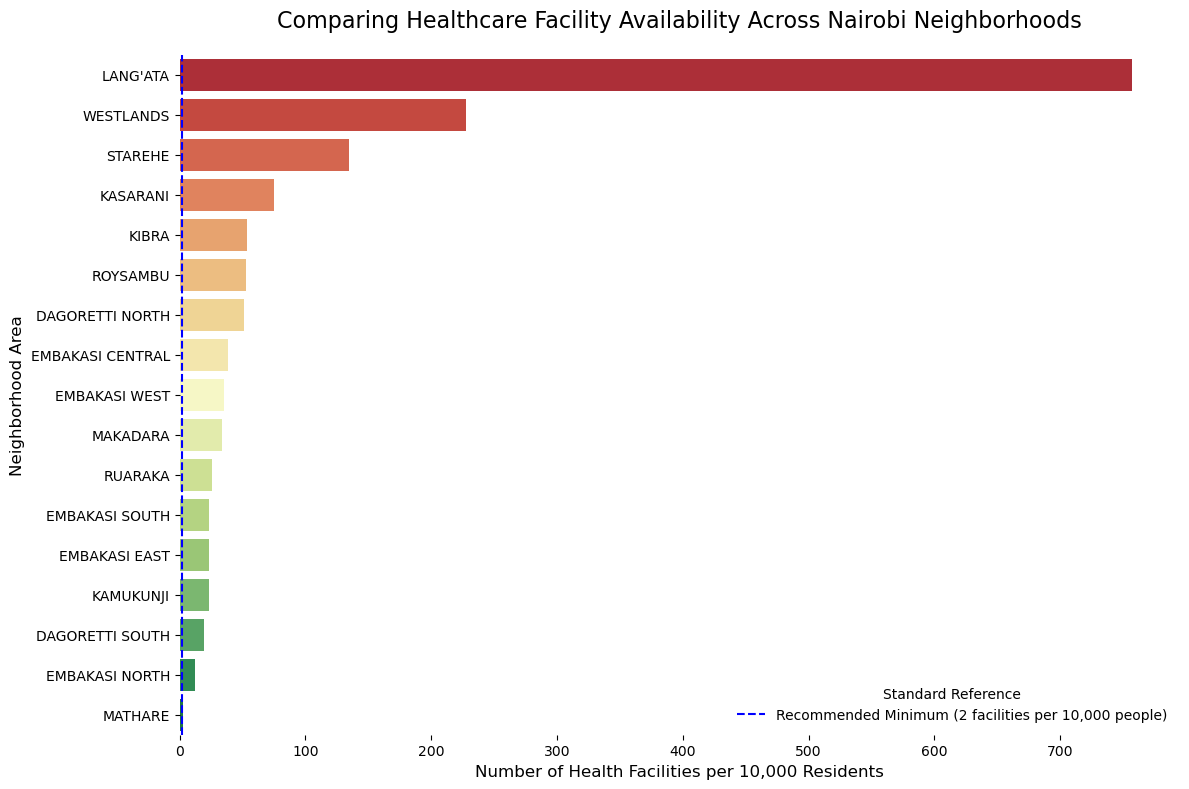

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# e healthcare facilities per 10,000 residents
healthcare_access = (merged_data.groupby('Constituency')
                     .agg({'Facility Name':'count',
                           'Population Density (No. per Sq. Km)':'mean'})
                     .reset_index())

# facilities per 10k people
healthcare_access['Facilities_per_10k'] = (
    healthcare_access['Facility Name'] / 
    (healthcare_access['Population Density (No. per Sq. Km)'] / 10000)
)

# sorting best to worst
healthcare_access = healthcare_access.sort_values('Facilities_per_10k', ascending=False)

# Create easy-to-understand visualization
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=healthcare_access,
                 x='Facilities_per_10k',
                 y='Constituency',
                 palette='RdYlGn')

# WHO standard reference line
plt.axvline(x=2, color='blue', linestyle='--', 
            label='Recommended Minimum (2 facilities per 10,000 people)')

# title, x and y labels
plt.title('Comparing Healthcare Facility Availability Across Nairobi Neighborhoods', 
          pad=20, fontsize=16)
plt.xlabel('Number of Health Facilities per 10,000 Residents', fontsize=12)
plt.ylabel('Neighborhood Area', fontsize=12)
plt.legend(title='Standard Reference', frameon=False)

# remiving cahrt borders not neeeded
sns.despine(left=True, bottom=True)

# constituency names for better readability
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()

# saving teh image
plt.savefig('nairobi_healthcare_facility_access.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Bina\AppData\Local\Temp\ipykernel_9736\1888743425.py:59: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



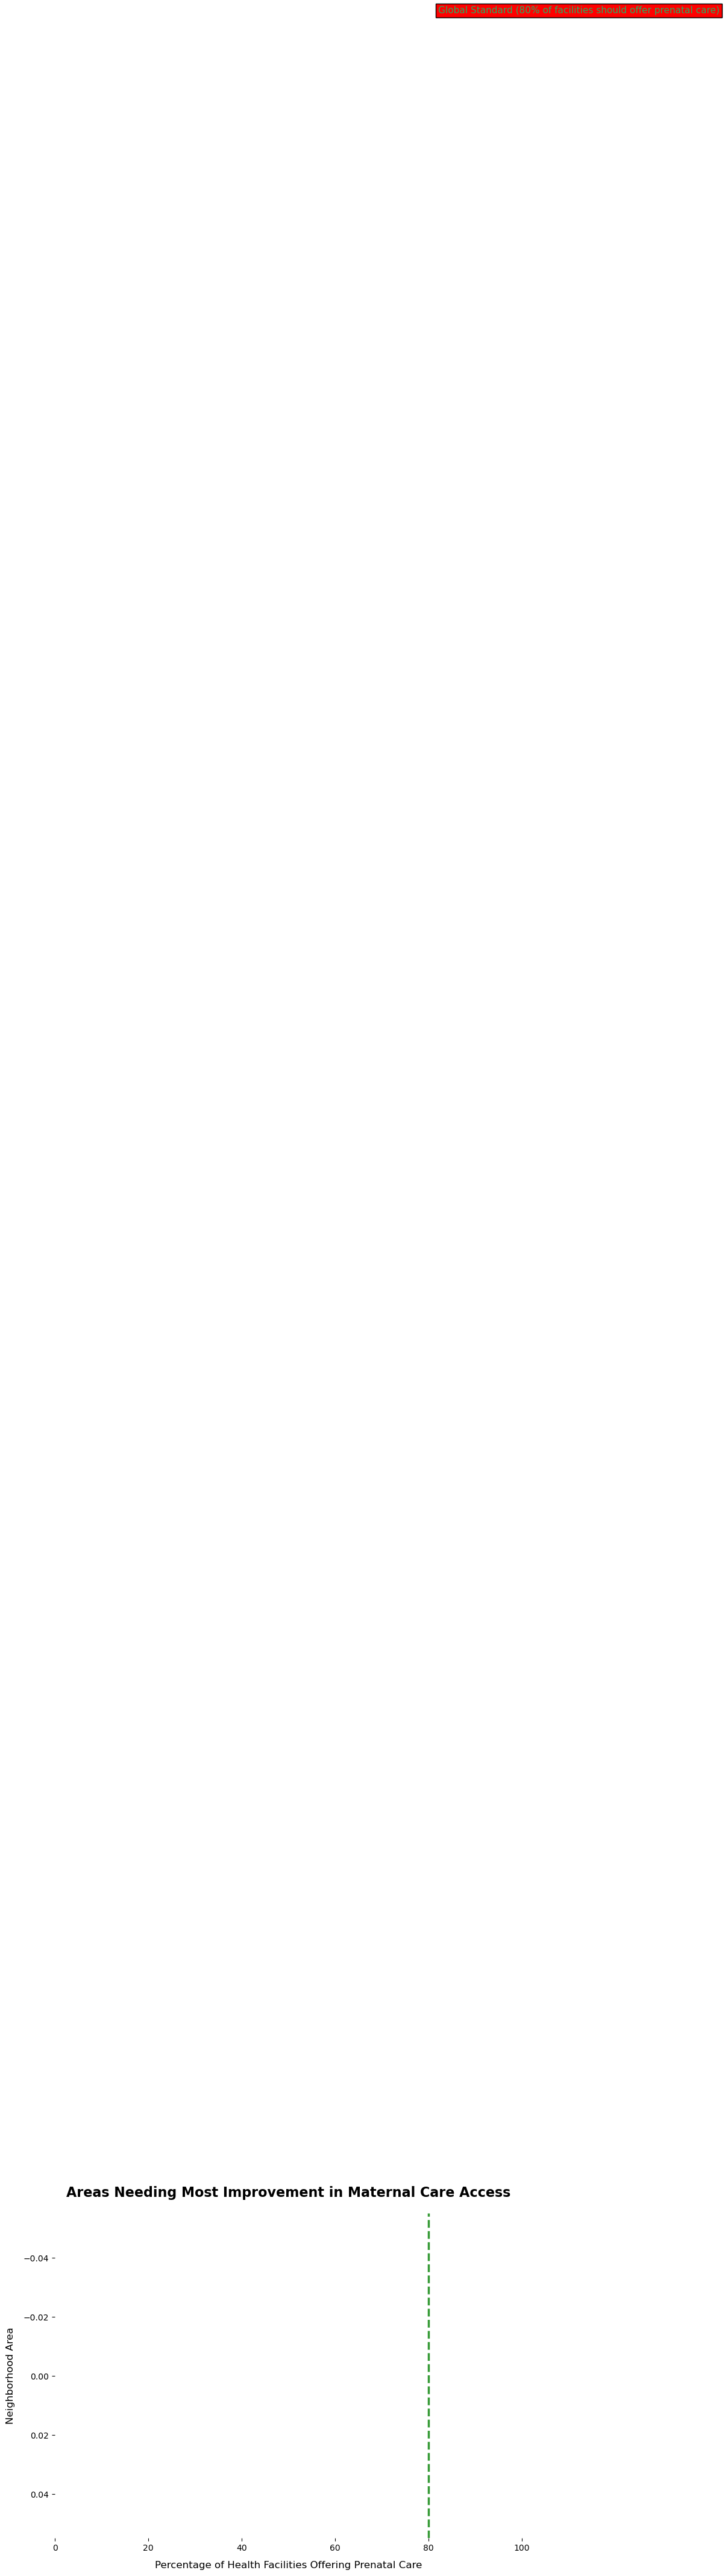

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare ANC coverage data (focusing on areas needing most improvement)
anc_coverage = (merged_data.groupby('Constituency')['ANC']
                # mean ANC coverage per constituency
                .mean()
                # handling  infinite values
                .replace([np.inf, -np.inf], np.nan)
                # remiving missing data
                .dropna()
                # from lowest to highest
                .sort_values()
                  #5 areas with greatest need
                .head(5))

plt.figure(figsize=(10, 7))
bars = plt.barh(anc_coverage.index, 
                anc_coverage.values*100, 
                color='red',
                height=0.6)

# clear title and labels
plt.title('Areas Needing Most Improvement in Maternal Care Access', 
          fontsize=16, pad=20, weight='bold')
plt.xlabel('Percentage of Health Facilities Offering Prenatal Care', 
           fontsize=12, labelpad=10)
plt.ylabel('Neighborhood Area', fontsize=12, labelpad=10)
plt.xlim(0, 100)

# percentage labels inside bars for clarity
for i, (area, coverage) in enumerate(anc_coverage.items()):
    if not np.isnan(coverage):
        plt.text(
            min(coverage*100 + 2, 95),
            i,
            f'{coverage*100:.0f}% of facilities',
            va='center',
            fontsize=11,
            bbox=dict(facecolor='blue', alpha=0.8, edgecolor='black', pad=2)
        )

# global health target with explanation
plt.axvline(x=80, color='green', linestyle='--', linewidth=2.5, alpha=0.8)
plt.text(
    82,
    len(anc_coverage)-0.8,
    'Global Standard (80% of facilities should offer prenatal care)',
    color='#27AE60',
    fontsize=11,
    bbox=dict(facecolor='red', alpha=1, pad=3)
)

# Clean up the chart
sns.despine(left=True, bottom=True)
# Show worst performer at top
plt.gca().invert_yaxis()
plt.tight_layout(pad=2)

plt.savefig('maternal_care_improvement_areas.png', 
            dpi=300, 
            bbox_inches='tight',
            transparent=False)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

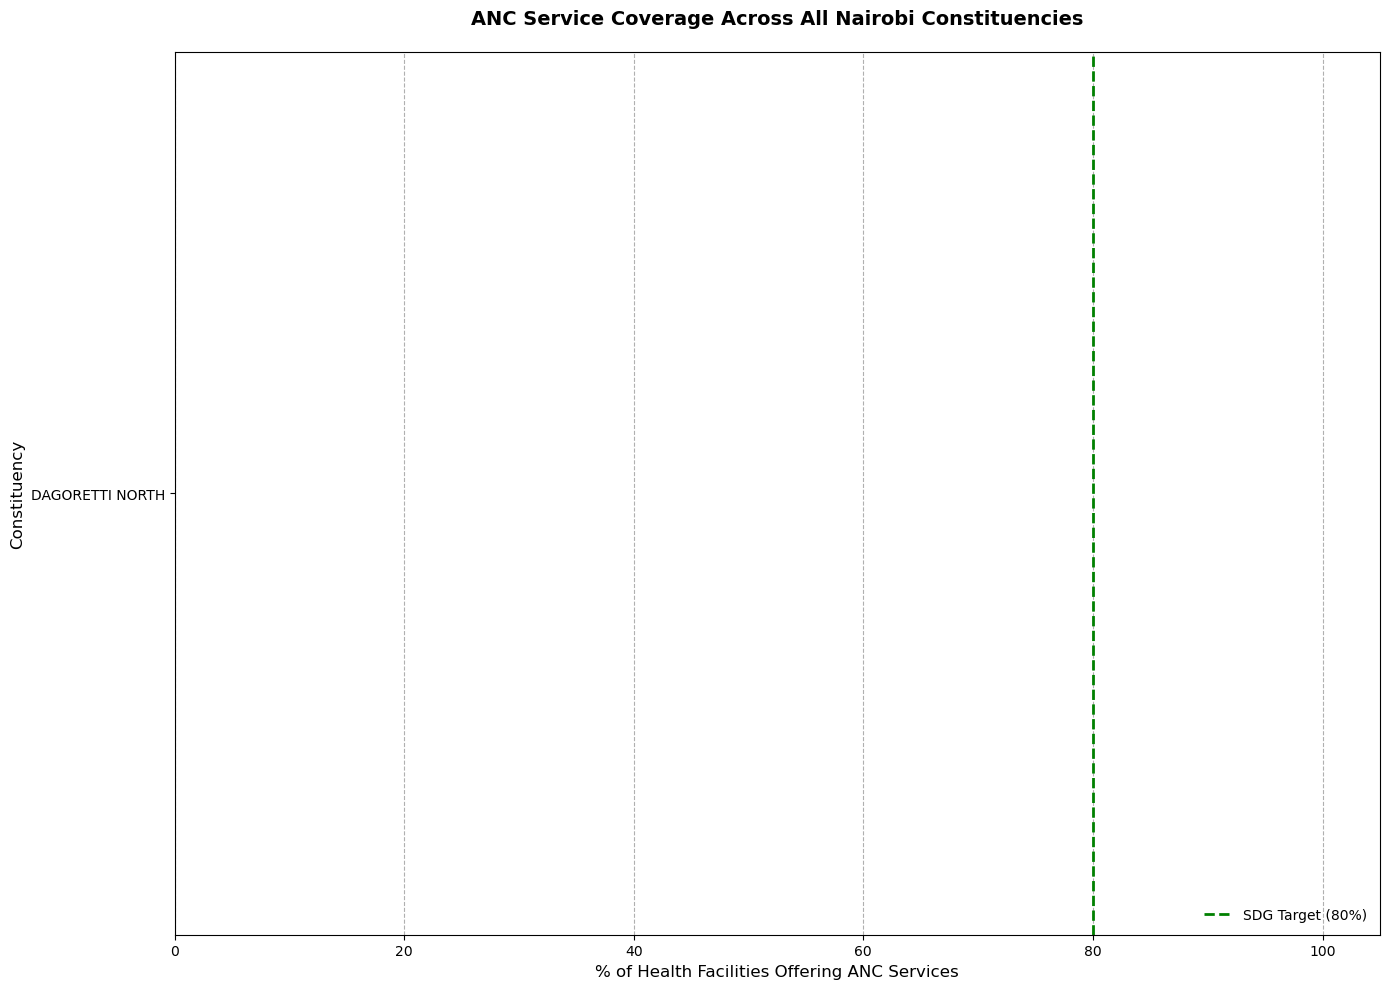

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# calculating ANC coverage for all constituencies
anc_coverage = merged_data.groupby('Constituency')['ANC'].mean().sort_values()

# figure with enough size to show all consituencies
plt.figure(figsize=(14, 10))

# horizontal bars
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(anc_coverage)))
bars = plt.barh(anc_coverage.index, anc_coverage.values*100, color=colors, height=0.7)

# adding sgd target line
plt.axvline(x=80, color='green', linestyle='--', linewidth=2, label='SDG Target (80%)')

# adding % labels
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height()/2
    # keeps text in chart
    plt.text(min(width+1, 99),
             y_pos, 
             f'{width:.0f}%', 
             va='center',
             ha='left',
             fontsize=10,
             bbox=dict(facecolor='blue', alpha=0.7, edgecolor='none', pad=1))

# customizing the appearance
plt.title('ANC Service Coverage Across All Nairobi Constituencies', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('% of Health Facilities Offering ANC Services', fontsize=12)
plt.ylabel('Constituency', fontsize=12)
plt.xlim(0, 105)
plt.legend(loc='lower right', frameon=False)

# incresing size for y-axis labels
plt.yticks(fontsize=10)

# adding grid for easier readbility
plt.grid(axis='x', linestyle='--', alpha=1.0)

# Highlight constituencies below target
for i, value in enumerate(anc_coverage.values*100):
    if value < 80:
        bars[i].set_alpha(0.8)

plt.tight_layout()
plt.savefig('all_constituencies_anc_coverage.png', dpi=300, bbox_inches='tight')
plt.show()

Available columns in merged_data:
['Facility Code', 'Facility Name', 'Province', 'County', 'District', 'Division', 'Type', 'Owner', 'Location', 'Sub Location', 'Description of Location', 'Constituency', 'Nearest Town', 'Beds', 'Cots', 'Official Landline', 'Official Fax', 'Official Mobile', 'Official Email', 'Official Address', 'Official Alternate No', 'Town', 'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours', 'Open Weekends', 'Operational Status', 'ART', 'C-IMCI', 'FP', 'HBC', 'IPD', 'Owner_Category', 'ANC', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'EPI', 'GROWM', 'HCT', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH', 'Population Density (No. per Sq. Km)', 'Facilities_per_10k', 'Beds_per_1k', 'ANC_Coverage', 'CEOC_Coverage', 'RAD/XRAY_Coverage', 'SDG_3.1_Score', 'SDG_3.3_Score', 'SDG_3.8_Score', 'SDG_Gaps', 'SDG_Score', 'Priority_Level']


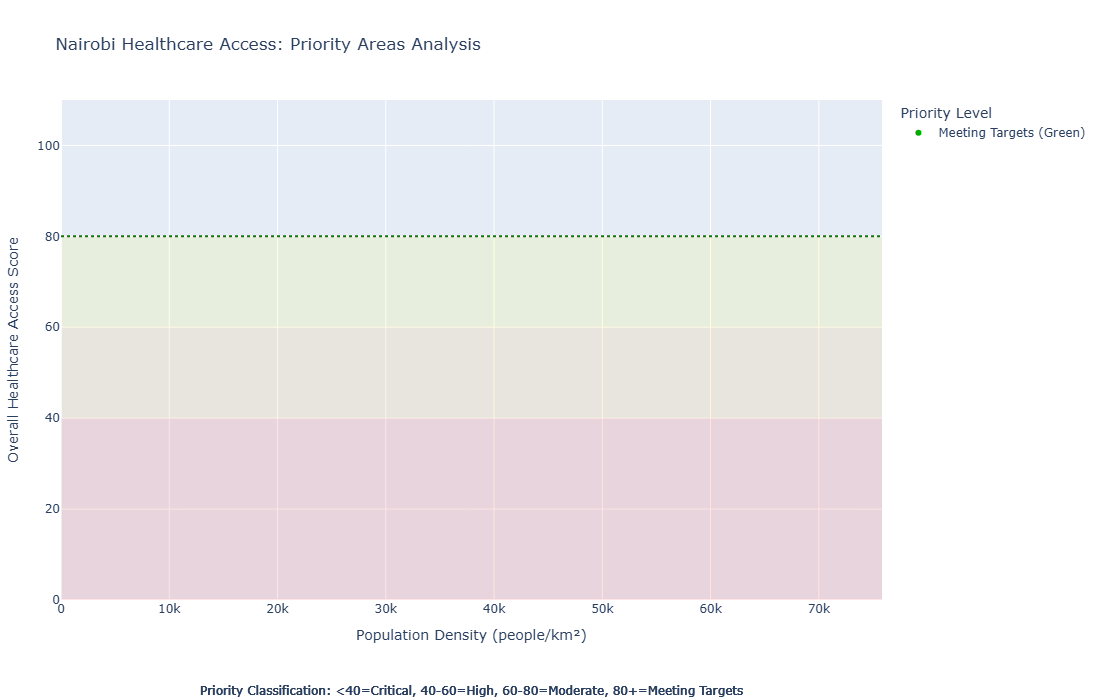

In [107]:
import plotly.express as px
import pandas as pd

# Check available columns first
print("Available columns in merged_data:")
print(merged_data.columns.tolist())

# Priority levels function
def assign_priority(score):
    if score < 40:
        return 'Critical Priority (Red)'
    elif score < 60:
        return 'High Priority (Orange)'
    elif score < 80:
        return 'Moderate Priority (Yellow)'
    else:
        return 'Meeting Targets (Green)'

# Prepare priority levels
if 'SDG_Score' in merged_data.columns:
    merged_data['Priority_Level'] = merged_data['SDG_Score'].apply(assign_priority)
else:
    print("Warning: SDG_Score column not found - cannot assign priority levels")
    merged_data['Priority_Level'] = 'Data Not Available'

priority_colors = {
    'Critical Priority (Red)': '#FF0000',
    'High Priority (Orange)': '#FFA500',
    'Moderate Priority (Yellow)': '#FFFF00',
    'Meeting Targets (Green)': '#00AA00',
    'Data Not Available': '#CCCCCC'
}

# Prepare hover data - only include available columns
hover_data = {
    'ANC_Coverage': ':.0%' if 'ANC_Coverage' in merged_data.columns else None,
    'TB_DIAG_Coverage': ':.0%' if 'TB_DIAG_Coverage' in merged_data.columns else None,
    'Facilities_per_10k': ':.1f' if 'Facilities_per_10k' in merged_data.columns else None,
    'Population Density (No. per Sq. Km)': ':,.0f' if 'Population Density (No. per Sq. Km)' in merged_data.columns else None,
    'SDG_Score': ':.0f' if 'SDG_Score' in merged_data.columns else None,
    'Priority_Level': False
}

# Remove None values from hover_data
hover_data = {k: v for k, v in hover_data.items() if v is not None}

# Create visualization with safe parameters
fig = px.scatter(
    merged_data.drop_duplicates('Constituency'),
    x='Population Density (No. per Sq. Km)' if 'Population Density (No. per Sq. Km)' in merged_data.columns else None,
    y='SDG_Score' if 'SDG_Score' in merged_data.columns else None,
    size='Population' if 'Population' in merged_data.columns else None,  # Only use if available
    color='Priority_Level',
    color_discrete_map=priority_colors,
    hover_name='Constituency',
    category_orders={'Priority_Level': [
        'Critical Priority (Red)', 
        'High Priority (Orange)', 
        'Moderate Priority (Yellow)', 
        'Meeting Targets (Green)',
        'Data Not Available'
    ]},
    hover_data=hover_data,
    title='Nairobi Healthcare Access: Priority Areas Analysis',
    labels={
        'SDG_Score': 'Overall Healthcare Access Score',
        'Population Density (No. per Sq. Km)': 'Population Density (people/km²)',
        'Priority_Level': 'Priority Tier'
    },
    height=700
)

# Add reference lines only if SDG_Score exists
if 'SDG_Score' in merged_data.columns:
    fig.add_hrect(y0=0, y1=40, line_width=0, fillcolor="red", opacity=0.1)
    fig.add_hrect(y0=40, y1=60, line_width=0, fillcolor="orange", opacity=0.1)
    fig.add_hrect(y0=60, y1=80, line_width=0, fillcolor="yellow", opacity=0.1)
    fig.add_hline(y=80, line_dash="dot", line_color="green", 
                annotation_text="SDG Target", annotation_position="bottom right")

# Add annotations for top priority areas if available
if all(col in merged_data.columns for col in ['Constituency', 'SDG_Score', 'Population Density (No. per Sq. Km)']):
    try:
        for i in range(min(3, len(merged_data))):
            area = merged_data.sort_values('SDG_Score').iloc[i]['Constituency']
            x_val = merged_data[merged_data['Constituency'] == area]['Population Density (No. per Sq. Km)'].values[0]
            y_val = merged_data[merged_data['Constituency'] == area]['SDG_Score'].values[0]
            fig.add_annotation(
                x=x_val,
                y=y_val,
                text=f"{i+1}. {area}",
                showarrow=True,
                arrowhead=1,
                ax=-50,
                ay=-40*(i+1)
            )
    except Exception as e:
        print(f"Couldn't add priority area annotations: {str(e)}")

# Customize layout
fig.update_layout(
    legend_title_text='Priority Level',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
    margin=dict(l=50, r=50, b=100, t=100),
    annotations=[
        dict(
            x=0.5,
            y=-0.2,
            xref='paper',
            yref='paper',
            text="Priority Classification: <40=Critical, 40-60=High, 60-80=Moderate, 80+=Meeting Targets",
            showarrow=False
        )
    ]
)

# Set axis ranges if columns exist
if 'Population Density (No. per Sq. Km)' in merged_data.columns:
    fig.update_xaxes(range=[0, merged_data['Population Density (No. per Sq. Km)'].max()*1.1])
if 'SDG_Score' in merged_data.columns:
    fig.update_yaxes(range=[0, 110])

fig.write_html("nairobi_priority_areas.html")
fig.show()

| Constituency     |   Facilities_per_10k |   ANC |   TB DIAG |   Population Density (No. per Sq. Km) |
|:-----------------|---------------------:|------:|----------:|--------------------------------------:|
| MATHARE          |                 0    |   nan |       nan |                               68941   |
| EMBAKASI NORTH   |                 0    |   nan |       nan |                               11460   |
| DAGORETTI SOUTH  |                 0    |   nan |       nan |                               14908   |
| KAMUKUNJI        |                 0    |   nan |       nan |                               25455   |
| EMBAKASI EAST    |                 0    |   nan |       nan |                               11460   |
| EMBAKASI SOUTH   |                 0    |   nan |       nan |                               11460   |
| RUARAKA          |                 0    |   nan |       nan |                               15785.9 |
| MAKADARA         |                 0    |   nan |       nan | 

C:\Users\Bina\AppData\Local\Temp\ipykernel_21256\3544848643.py:32: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.

C:\Users\Bina\AppData\Local\Temp\ipykernel_21256\3544848643.py:33: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.



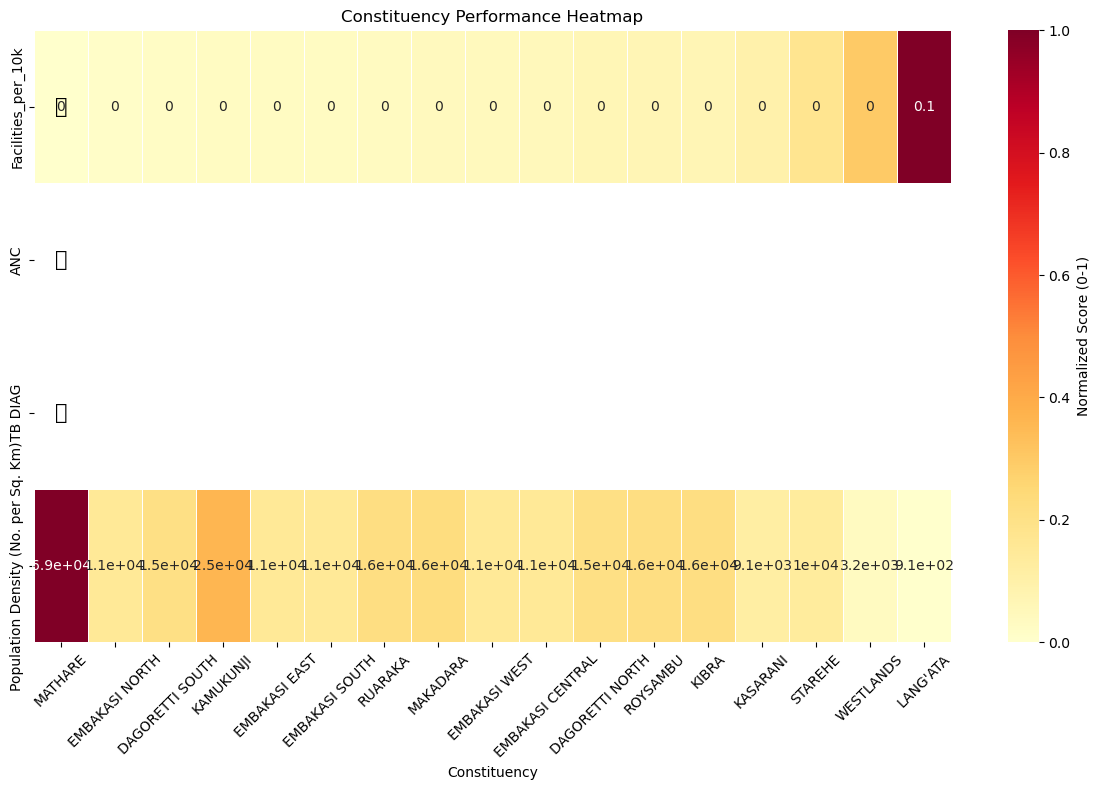

In [327]:
# comparison table and heatmap
comparison_table = merged_data.groupby('Constituency').agg({
    'Facilities_per_10k':'mean',
    'ANC':'mean',
    'TB DIAG':'mean',
    'Population Density (No. per Sq. Km)':'mean'
}).sort_values('Facilities_per_10k')

print(comparison_table.round(2).to_markdown())

import seaborn as sns
import matplotlib.pyplot as plt

# normlaizing data for th heat map 
heatmap_data = comparison_table.copy()
heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data.T, 
    annot=comparison_table.T.round(1),
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={'label': 'Normalized Score (0-1)'}
)

# highlighting worst performers
for i in range(3):
    plt.text(0.5, i+0.5, 'ALERT!!', ha='center', va='center', fontsize=15)

plt.title("Constituency Performance Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('heatmap_comparison.png', dpi=300)